<div class="alert alert-info"  style="border:2px solid black; border-radius: 15px">
    <div style="text-align:center; font-size:150%; font-weight:bold; color:navy">
       <u>Terminale spécialité physique</u> 
       <br />
       <br />
       TP Détermination d'une vitesse à l'aide de l'effet DOPPLER.
        <br /><br />
        <div style="color:red;">
        Evaluation de l'incertitude par la méthode de Monte-Carlo
        </div>
        </div>
   </div>
</div>

La relation permettant de calculer la vitesse à partir de la mesure de deux fréquences est la suivante:

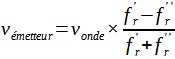

* f' est la fréquence mesurée lorsque l'émetteur se rapproche.
* f'' est la fréquence mesurée lorsque l'émetteur s'éloigne.
*  $V_{onde} $ est la vitesse de propagation de l'onde (ici 340 m/s pour le son dans l'air).


Les mesure de f', f'' sont déterminer à l'aide du logiciel Audacity

On estime les incertitudes sur f' et f'' en étant réaliste

<div class="alert alert-warning">
    
## Principe du programme Python ##
Chaque grandeur mesurée est considérée comme une **variable aléatoire** dont la répartition est centrée sur la valeur mesurée, dont l'étendue est liée à la précision des appareils utilisés et dont la forme dépend de la façon dont la grandeur est mesurée.<br>
Pour chaque grandeur intervenant dans le calcul de la vitesse, on effectue **N** tirages aléatoires.<br>
On obtient ainsi **N** valeurs de la vitesse cherchée :
* La valeur moyenne est la valeur retenue comme résultat du titrage.
* L'écart-type de la distribution est l'incertitude type sur cette valeur.
    


!!! info Importation des bibliothèques et instructions
La cellule ci-dessous importe ou définit :
* *numpy* pour générer les valeurs aléatoires ;
* *pyplot* pour les représentations graphiques ;
* *mean* et *stdev* : les fonctions moyenne et écart-type.

!!!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev



!!! note Entrée des données du titrage et de la simulation
On entre ci-dessous les données permettant de déterminer la vitesse inconnue, ainsi que les informations liées à la précision des mesures.<br>
Remarque : le nombre de valeurs pour la simulation doit être suffisamment élevé pour que celle-ci soit significative mais on déconseille de dépasser le million pour des raisons de temps de calcul.
!!!

In [ ]:
Vonde = float(input("Entrez la vitesse de propagation de l'onde en m/s : "))
etendue_v = float(input("Entrez l'étendue sur laquelle on connait la vitesse de l'onde en m/s : "))
f_2 = float(input("Entrez la valeur de la fréquence lorsque l'émetteur se rapproche en Hz : "))
f_1 = float(input("Entrez la valeur de la fréquence lorsque l'émetteur s'éloigne' en Hz : "))
etendue_f = float(input("Entrez l'étendue sur laquelle vous mesurez les fréquences f1 et f2 en Hz : "))
N = int(input("Entrez le nombre de valeurs pour la simulation : "))

!!! info Distribution de la valeur de la vitesse de l'onde $\mathbf{V_{onde}}$

La liste avec N valeurs de la vitesse de l'onde est construite et on trace la distribution des valeurs.
!!!

In [ ]:
e = etendue_v/(2)
V_onde = [Vonde + np.random.uniform(-e, e) for i in range(N)]

plt.figure(1)
plt.clf()
plt.title("Distribution de la vitesse de l'onde")
plt.hist(V_onde, bins=400, color="green", density="true")
plt.xlabel("V_onde")
plt.show()
print(f"Vitesse de l'onde: {mean(V_onde):.3e} m/s")
print(f"Écart-type sur la valeur de la vitesse : {stdev(V_onde):.3e} m/s")

!!! info Distribution ddes fréquences $\mathbf{f_{1}}$ et $\mathbf{f_{2}}$
On prend en compte l'étendue des mesuresavec une distribution **triangulaire** .
!!!

In [ ]:
f = etendue_f/(4)
f2 = [f_2 + np.random.uniform(-f, f) + np.random.uniform(-f, f) for i in range(N)]

plt.figure(2)
plt.clf()
plt.title("Distribution de la fréquence d'approche")
plt.hist(f2, bins=400, color="blue", density="true")
plt.xlabel("f_2")
plt.show()
print(f"f2: {mean(f2):.3e} Hz")
print(f"Écart-type sur la valeur de f2 : {stdev(f2):.3e} Hz")

f = etendue_f/(4)
f1 = [f_1 + np.random.uniform(-f, f) + np.random.uniform(-f, f) for i in range(N)]

plt.figure(3)
plt.clf()
plt.title("Distribution de la fréquence d'éloignement")
plt.hist(f1, bins=400, color="red", density="true")
plt.xlabel("f_1")
plt.show()
print(f"f1: {mean(f1):.3e} Hz")
print(f"Écart-type sur la valeur de f1 : {stdev(f1):.3e} Hz")

!!! info Distribution de la vitesse du mobile émetteur $\mathbf{V_{émetteur}}$
Il reste à calculer les **N** valeurs de la vitesse de l'émetteur en utilisant la relation rappelée au début de ce Notebook.
!!!

In [ ]:
Vem = [V_onde[i] * ( (f2[i] - f1[i]) / (f2[i] + f1[i])) for i in range(N)]
plt.figure(4)
plt.clf()
plt.title("Distribution de la vitesse de l'émetteur")
plt.hist(Vem, bins=400, color="black", density="true")
plt.xlabel("V_émetteur")
plt.show()

!!! info Calcul de la valeur de la vitesse de l'émetteur retenue et de l'incertitude type associée
Le résultat du titrage est la valeur moyenne de cette distribution.<br>
L'incertitude type associée est l'écart-type de la distribution.<br>
La cellule ci-dessous calcule ces deux valeurs, il reste à les arrondir avec cohérence :
* un seul chiffre significatif pour l'incertitude type ;
* nombre de chiffres siginificatifs du résultat en accord avec la précision donnée de l'incertitude type.
!!!

In [ ]:
VE = mean(Vem)  # Calcul de la moyenne
VEk = VE * 3.6
ecartVE = stdev(Vem)  # Calcul de l'écart-type
ecartVEk = ecartVE * 3.6

print(f"La vitesse du mobile émetteur est de  : {VE:.4e} m/s soit {VEk:.4e} km/h")
print(f"Écart-type sur la valeur de la vitesse : {ecartVE:.2e} m/s soit {ecartVEk:.2e} km/h")